## Harmonic fit of seasonal cycle
#### MLML MS 263

Python code to reproduce the results in Section 5.5.2 of Emery and Thomson. Annual and semi-annual harmonics are fit to a two-year long record of sea surface temperature using a least-squares method.

In [168]:
%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt

Plot monthly SST data from the west coast of Vancouver Island, 1982-1983 (Emery and Thomson, Table 5.1).

<IPython.core.display.Javascript object>


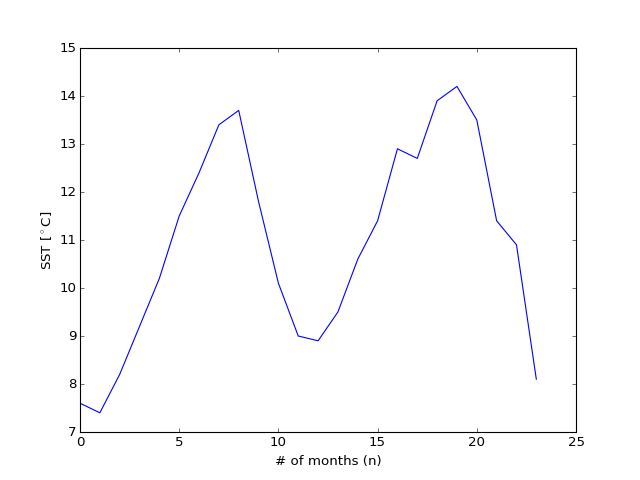

In [169]:
SST = np.array([7.6, 7.4, 8.2, 9.2, 10.2, 11.5, 12.4, 13.4, 13.7, 11.8, 10.1, 9.0,
                8.9, 9.5, 10.6, 11.4, 12.9, 12.7, 13.9, 14.2, 13.5, 11.4, 10.9, 8.1])

plt.figure()
plt.plot(SST)
plt.xlabel('# of months (n)')
plt.ylabel('SST [$^\circ$C]')

Construct the **D** matrix (Equation 5.5.13). The off-diagonal elements are all zero because the record length (24 months) is an exact multiple of the periods of the harmonics being fit (12 months and 6 months). For a record length of exactly 48 monthly values (twice as long), these values would be greater by a factor of two.

In [170]:
D = np.diag([24, 12, 12, 12, 12])
print D

[[24  0  0  0  0]
 [ 0 12  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0 12  0]
 [ 0  0  0  0 12]]


Contruct the **y** vector (Equation 5.5.14). These are the sums of the time series, *x*, times sines and cosines at the harmonic frequencies. The first element represents the zero frequency harmonic, and is just the sum of the values in *x*.

In [171]:
N = len(SST) # number of samples
n = np.array(range(1,N+1)) # sequence from 1 to N
x = SST # Rename SST to X for consistency with notation in book
alpha1 = 2 # record length (24 months) x frequency of harmonic 1 (1/12 cycles per month)
alpha2 = 4 # record length (24 months) x frequency of harmonic 2 (1/6 cycles per month)

yco = np.sum(x)
yc1 = np.sum(x*np.cos(2*np.pi*alpha1*n/N))
yc2 = np.sum(x*np.cos(2*np.pi*alpha2*n/N))
ys1 = np.sum(x*np.sin(2*np.pi*alpha1*n/N))
ys2 = np.sum(x*np.sin(2*np.pi*alpha2*n/N))

y = [yco, yc1, yc2, ys1, ys2]

print y

[262.5, -21.455702305034833, -5.4000000000000261, -23.768137870333042, -0.51961524227064082]


Solve for the coefficients by solving **z** = **D**$^{-1}$**y**

The first element is the mean (or coefficient for the zero-frequency cosine). The second element is the coefficient for the cosine at the annual frequency. The third element is the coefficient for the cosine at the semi-annual frequency. The fourth element is the coefficient for the sine at the annual frequency.  The last element is the coefficient for the sine at the semi-annual frequency.

In [172]:
z = np.linalg.solve(D,y)
print z

[ 10.9375      -1.78797519  -0.45        -1.98067816  -0.04330127]


Use these coefficients to construct the harmonic fit.

In [173]:
# time series of harmonic fit
SST_fit = z[0] + z[1]*np.cos(2*np.pi*alpha1*n/N) + \
            z[2]*np.cos(2*np.pi*alpha2*n/N)+ \
            z[3]*np.sin(2*np.pi*alpha1*n/N) + \
            z[4]*np.sin(2*np.pi*alpha2*n/N)

Plot the original data and the harmonic fit.

<IPython.core.display.Javascript object>


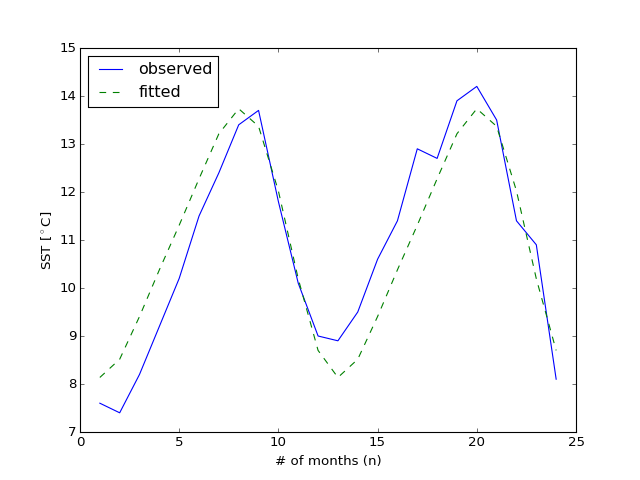

In [174]:
plt.figure()
plt.plot(n,SST,n,SST_fit,'--')
plt.xlabel('# of months (n)')
plt.ylabel('SST [$^\circ$C]')
plt.legend(['observed','fitted'],loc='best')

Plot the residuals (orignal data - harmonic fit).

<IPython.core.display.Javascript object>


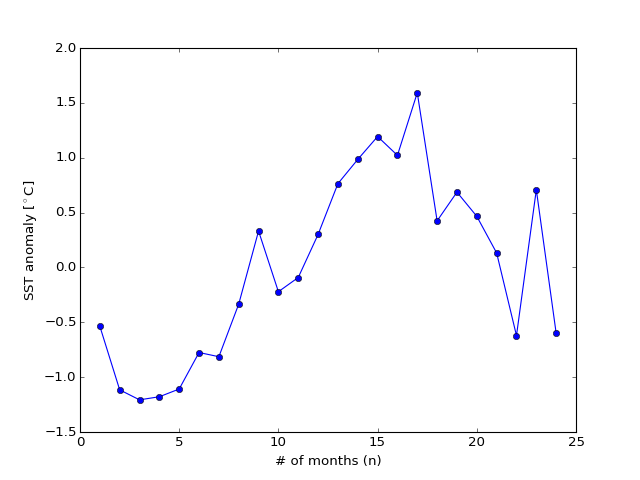

In [175]:
plt.figure()
plt.plot(n,SST-SST_fit,'-o')
plt.xlabel('# of months (n)')
plt.ylabel('SST anomaly [$^\circ$C]')